In [20]:
from netCDF4 import Dataset
from netCDFfunc.utility import get_data_sequence, get_data_A, get_data_by_date, save_img, show_img, masking, cropping, test_data_write

import numpy as np

from collections import Counter
import datetime as dt

import os
import math
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
base_dir = '/Volumes/T7/AVHRR_OI_SST/v2.1/'

In [3]:
ds_in = get_data_by_date(base_dir=base_dir,
                         get_data_func=get_data_A,
                         var_name='sst',
                         start_date=(1991,1,1),
                         end_date=(2020,12,31))

  0%|          | 0/30 [00:00<?, ?it/s]

In [4]:
ds_ice = get_data_by_date(base_dir=base_dir,
                          get_data_func=get_data_A,
                          var_name='ice',
                          start_date=(1991,1,1),
                          end_date=(2020,12,31),
                          is_mask=True)

  0%|          | 0/30 [00:00<?, ?it/s]

# avg

In [5]:
days = [31,28,31,30,31,30,31,31,30,31,30,31] #
save_dir = '/Volumes/T7/new_data/processed_data/processed_data_2_rok_avg'

for month, day_len in tqdm(zip(range(1,13), days)):
    for day in range(1,day_len+1):
        
        date = dt.date(1000, month,day).strftime('%m%d')
        
        file_name = f'30_years_dataset_2_rok_{date}'

        nc_path = os.path.join(save_dir, file_name+'.nc')

        ds_new = Dataset(nc_path, 'w', format='NETCDF4')
        title = 'Global 30 years(1991~2020) SST mean data'
        comment = 'calculation 1991/1/1 ~ 2020/12/31'
        grid_size = 0.25
        
        data = np.mean(ds_in[(month,day)], axis=0)
        
        # rok
        lat_range = (440, 572) 
        lon_range = (440, 600)

        variable_name = 'avgsst'
        variable_standard_name = 'averageSST'
        variable_unit = 'degree C'
        variable_dtype = np.float32
        variable_values = data

        ds_new = test_data_write(ds_new, title, comment, grid_size,
                                 variable_name, 
                                 variable_standard_name, 
                                 variable_unit, 
                                 variable_dtype, 
                                 variable_values,
                                 lat_range,
                                 lon_range)
        

        ds_new.close()

0it [00:00, ?it/s]

In [28]:
ds_new.close()

# pctl

In [6]:
days = [31,28,31,30,31,30,31,31,30,31,30,31] #
save_dir = '/Volumes/T7/new_data/processed_data/processed_data_2_rok_pctl'

for month, day_len in tqdm(zip(range(1,13), days)):
    for day in range(1,day_len+1):
        
        date = dt.date(1000, month,day).strftime('%m%d')
        
        file_name = f'30_years_dataset_2_rok_90_percentile_{date}'

        nc_path = os.path.join(save_dir, file_name+'.nc')

        ds_new = Dataset(nc_path, 'w', format='NETCDF4')
        title = 'Global 30 years(1991~2020) SST 90-percentile data'
        comment = 'calculation 1991/1/1 ~ 2020/12/31'
        grid_size = 0.25
        
        data = np.percentile(ds_in[(month,day)], 90, axis=0)
        
        # rok
        lat_range = (440, 572) 
        lon_range = (440, 600)

        variable_name = 'pctlsst'
        variable_standard_name = '90-percentile SST'
        variable_unit = 'degree C'
        variable_dtype = np.float32
        variable_values = data

        ds_new = test_data_write(ds_new, title, comment, grid_size,
                                 variable_name, 
                                 variable_standard_name, 
                                 variable_unit, 
                                 variable_dtype, 
                                 variable_values,
                                 lat_range,
                                 lon_range)
        

        ds_new.close()

0it [00:00, ?it/s]

# ice

In [11]:
days = [31,28,31,30,31,30,31,31,30,31,30,31] #
save_dir = '/Volumes/T7/new_data/processed_data/processed_data_2_rok_ice'

for month, day_len in tqdm(zip(range(1,13), days)):
    for day in range(1,day_len+1):
        
        date = dt.date(1000, month,day).strftime('%m%d')
        
        file_name = f'30_years_dataset_2_rok_ice_{date}'

        nc_path = os.path.join(save_dir, file_name+'.nc')

        ds_new = Dataset(nc_path, 'w', format='NETCDF4')
        title = 'Global 30 years(1991~2020) Sea-ice data'
        comment = 'calculation 1991/1/1 ~ 2020/12/31 \t (for 30 years) more than 15% ice = ice, less than 15% ice = not ice'
        grid_size = 0.25
        
        ice_accum = np.sum(ds_ice[(month, day)], axis=0)
        np.place(ice_accum, ice_accum[:,:] < 30 * 0.15, False)
        np.place(ice_accum, ice_accum[:,:] >= 30 * 0.15, True)
        ice_accum = ice_accum.astype(bool)
        ice_accum = np.invert(ice_accum)
        
        data = ice_accum
        
        # rok
        lat_range = (440, 572) 
        lon_range = (440, 600)

        variable_name = 'ice'
        variable_standard_name = 'Sea-Ice'
        variable_unit = ''
        variable_dtype = np.int8
        variable_values = data

        ds_new = test_data_write(ds_new, title, comment, grid_size,
                                 variable_name, 
                                 variable_standard_name, 
                                 variable_unit, 
                                 variable_dtype, 
                                 variable_values,
                                 lat_range,
                                 lon_range)
        
        ds_new.close()

0it [00:00, ?it/s]

# test

In [24]:
for month, day_len in tqdm(zip(range(1,13), days)):
    for day in range(1,day_len+1):
        date = dt.date(1000, month,day).strftime('%m%d')
        
        ds_test = Dataset(f'/Volumes/T7/new_data/processed_data/processed_data_2_rok_ice/30_years_dataset_2_rok_ice_{date}.nc')
        save_img(ds_test.variables['ice'][:].data[0], f'/Volumes/T7/new_data/processed_data/test/30_years_dataset_2_rok_{date}', date)
        ds_test.close()

0it [00:00, ?it/s]

In [58]:
ds_test_1 = Dataset(f'/Volumes/T7/new_data/processed_data/processed_data_1_rok_ice/30_years_dataset_1_rok_ice_0101.nc', 'r', format='NETCDF4')
ds_test_2 = Dataset(f'/Volumes/T7/new_data/processed_data/processed_data_2_rok_ice/30_years_dataset_2_rok_ice_0101.nc', 'r', format='NETCDF4')

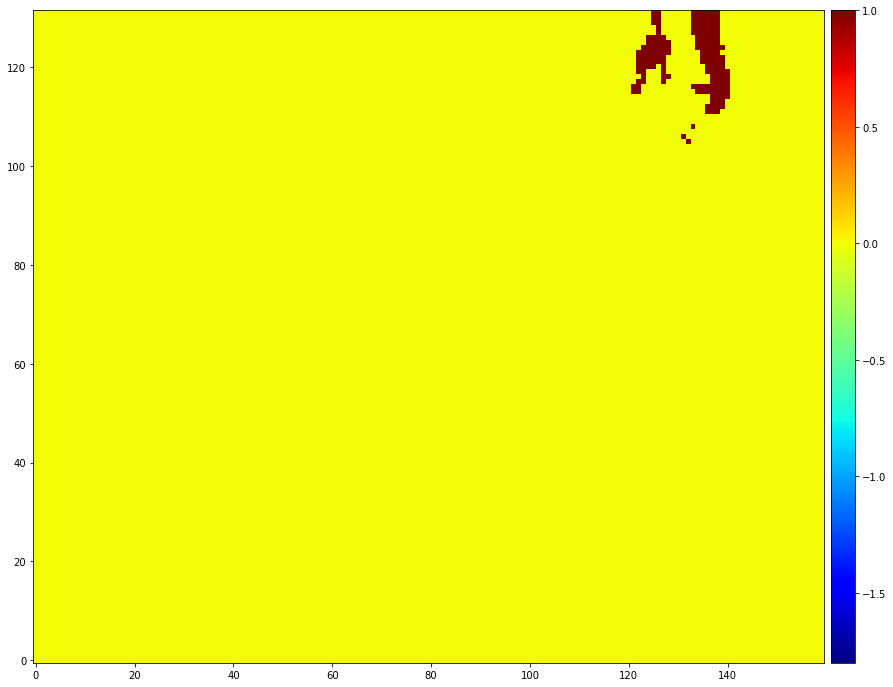

In [ ]:
show_img(ds_test_1.variables['ice'][:].data[0])

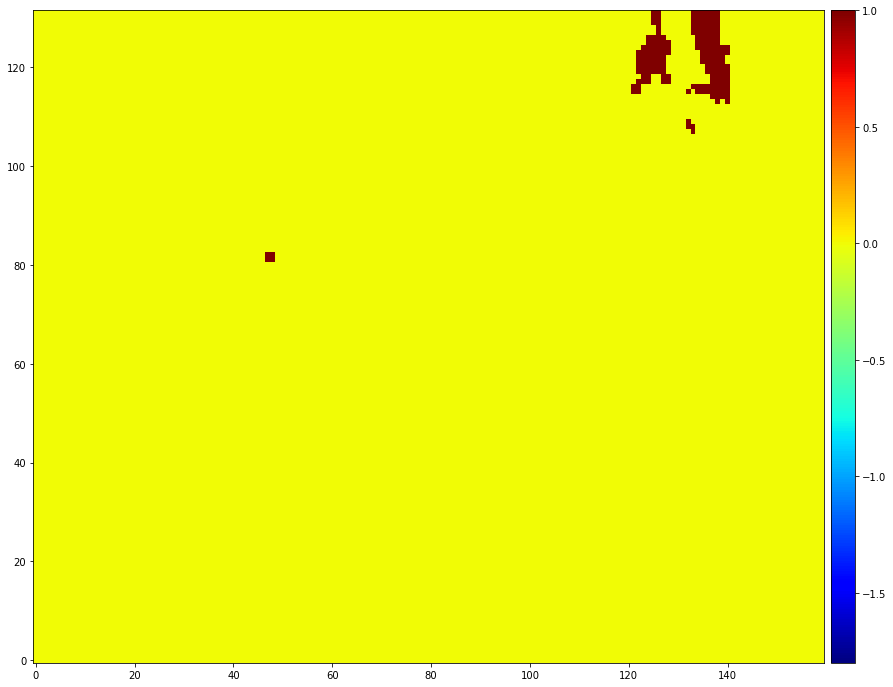

In [63]:
show_img(ds_test_2.variables['ice'][:].data[0])

In [47]:
ds_test_1.close()
ds_test_2.close()